In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# https://educationdata.org/number-of-college-graduates

In [11]:
df = pd.read_csv('../data/student_profiles_scored.csv')

In [20]:
df.head()

,field,major,bio,overall_score,Academics_and_research,Professional_experience,Leadership and Initiative,Depth_of_experience,Leadership_and_Initiative,Leadership_and_initiative
0,STEM,Computer Science,A dedicated student with expertise in object-o...,62,65,60,55.0,60,NaN,NaN
1,STEM,Computer Science,A dedicated and enthusiastic Computer Science ...,55,50,55,60.0,55,NaN,NaN
2,STEM,Computer Science,A dedicated student with a keen interest in so...,58,65,50,NaN,55,60.0,NaN
3,STEM,Computer Science,A dedicated student with a strong background i...,65,70,60,65.0,60,NaN,NaN
4,STEM,Computer Science,An aspiring computer scientist with a passion ...,55,60,50,NaN,50,55.0,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   field                      1799 non-null   object 
 1   major                      1799 non-null   object 
 2   bio                        1799 non-null   object 
 3   overall_score              1799 non-null   int64  
 4   Academics_and_research     1799 non-null   int64  
 5   Professional_experience    1799 non-null   int64  
 6   Leadership and Initiative  1135 non-null   float64
 7   Depth_of_experience        1799 non-null   int64  
 8   Leadership_and_Initiative  574 non-null    float64
 9   Leadership_and_initiative  90 non-null     float64
dtypes: float64(3), int64(4), object(3)
memory usage: 140.7+ KB


In [12]:
plt.style.use('seaborn')

In [22]:
print(df.columns)

Index(['field', 'major', 'bio', 'overall_score', 'Academics_and_research',
       'Professional_experience', 'Leadership and Initiative',
       'Depth_of_experience', 'Leadership_and_Initiative',
       'Leadership_and_initiative'],
      dtype='object')


### Scores by field

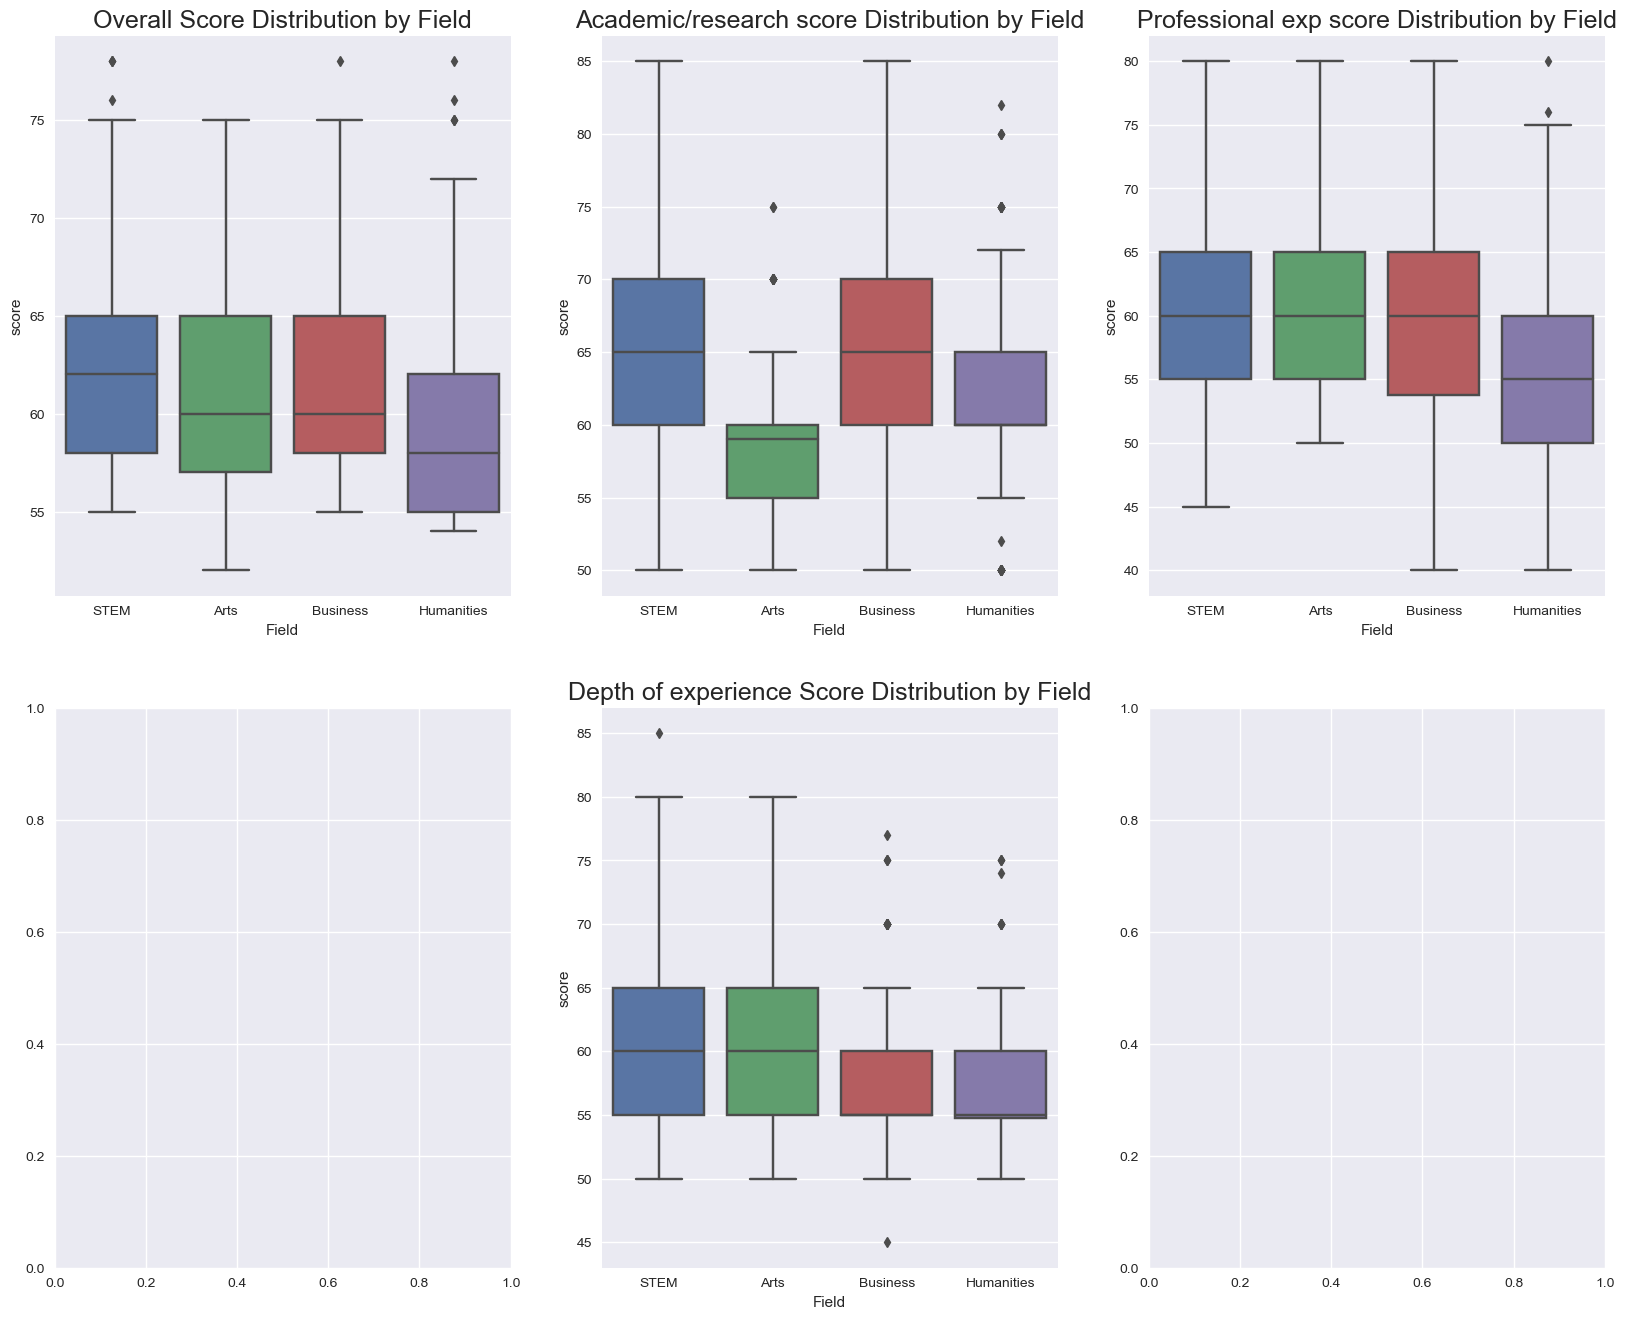

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(20, 16))

sns.boxplot(x='field', y='overall_score', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Overall Score Distribution by Field', fontsize=18)
axes[0, 0].set_xlabel('Field')
axes[0, 0].set_ylabel('score')

sns.boxplot(x='field', y='Academics_and_research', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Academic/research score Distribution by Field', fontsize=18)
axes[0, 1].set_xlabel('Field')
axes[0, 1].set_ylabel('score')

sns.boxplot(x='field', y='Professional_experience', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Professional exp score Distribution by Field', fontsize=18)
axes[0, 2].set_xlabel('Field')
axes[0, 2].set_ylabel('score')

# sns.boxplot(x='field', y='Leadership and Initiative', data=df, ax=axes[1, 0])
# axes[1, 0].set_title('leadership/initiative score Distribution by Field', fontsize=18)
# axes[1, 0].set_xlabel('Field')
# axes[1, 0].set_ylabel('score')

sns.boxplot(x='field', y='Depth_of_experience', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Depth of experience Score Distribution by Field', fontsize=18)
axes[1, 1].set_xlabel('Field')
axes[1, 1].set_ylabel('score')

plt.show()


In [18]:
 # 2. Category Scores Comparison
category_scores = df[['Academics_and_research', 'Professional_experience', 
                          'Leadership and Initiative', 'Depth_of_experience']]
sns.boxplot(data=category_scores, ax=axes[0, 1])
axes[0, 1].set_title('Category Scores Comparison')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

plt.show()

In [ ]:
 # 2. Category Scores Comparison
category_scores = df[['Academics_and_research', 'Professional_experience', 
                          'Leadership and Initiative', 'Depth_of_experience']]
sns.boxplot(data=category_scores, ax=axes[0, 1])
axes[0, 1].set_title('Category Scores Comparison')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# 3. Heatmap of Score Correlations
correlation_matrix = category_scores.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Score Category Correlations')

# 4. Score Distribution by Major
sns.violinplot(x='major', y='overall_score', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Score Distribution by Major')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout and save
plt.tight_layout()
plt.savefig('student_profile_analysis.png')
plt.close()

# Additional Statistical Summary
summary_stats = df.groupby('field')[['overall_score'] + 
    list(df.columns[df.columns.str.contains('_score')])
].agg(['mean', 'median', 'std'])
summary_stats.to_csv('field_score_summary.csv')